<img src="./images/op-amp.png">

The amplification happens on pins 5,6, and 7 of the op-amp in the circuit above.  Looking at this part of the circuit, we see that the op-amp is in a standard 'non-inverted amplifier' configuration:

<img src="https://upload.wikimedia.org/wikipedia/commons/6/66/Operational_amplifier_noninverting.svg">

(Image is from a Wikipedia entry on [op-amps](https://en.wikipedia.org/wiki/Operational_amplifier).)

Our sinusoidal input comes into the amplifier as $V_{in}$ on pin 5; and the amplified output $V_{out}$ on pin 7 is given by:

$$V_{out}=GV_{in}$$

where $G$ is the gain of the amplifier, and is predicted to be:

$$G = 1 + \frac{R_f}{R_g}$$

Where $R_f$ = "R9" in our circuit diagram above, and $R_g$ is the resistance provided by the probe in the water.  


In this initial experiment, we used $R_f=$ 4.67 KOhms. 

In [6]:
%matplotlib inline 
# above line allows for showing plots in a cell easily
import matplotlib # the main plotting library
#matplotlib.style.use('ggplot')
import numpy as np # allows for arrays
import matplotlib.pyplot as plt # getting specific plotting functions
import urllib # URL import functions
import pandas as pd # nice data utilities

Read in the experimental values ... 

In [35]:
q=pd.read_table('./data/wien_test_2016_02_13.csv', header=0,sep=',',names=['Rg','Venv','Vout']);
p=q.sort_values(['Rg'], ascending=[1]);rg_exp=p.Rg*1000

Generate the theoretical curve ...

In [57]:
Rf=46670
Rg = np.linspace(500, 47000, 100)  # 1 .. 430 kOhms
V_in=0.053  # was measured to be around 0.05 on scope; 
V_out = V_in*(1+(Rf/Rg))

Plot ...

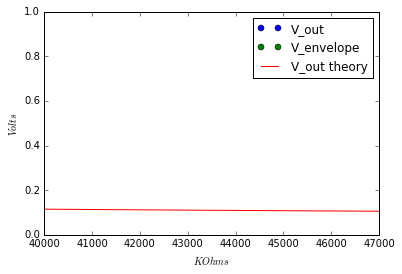

In [59]:
plt.plot(p.Rg*1000,p.Vout,'o',label='V_out');

plt.plot(p.Rg*1000,p.Venv,'o', label='V_envelope');

plt.plot(Rg,V_out, label='V_out theory');
plt.xlabel('$KOhms$')
plt.ylabel('$Volts$')
plt.ylim(0,1.);
plt.xlim(40000,47000);
plt.legend()

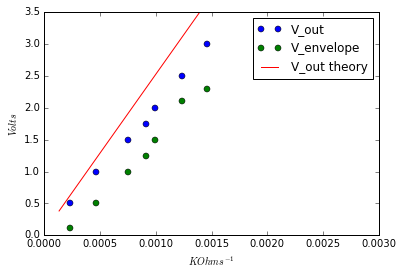

In [5]:
plt.plot(1/(p.Rg*1000),p.Vout,'o',label='V_out');
plt.plot(1/(p.Rg*1000),p.Venv,'o', label='V_envelope');
plt.plot(1/Rg,V_out, label='V_out theory');
plt.xlabel('$KOhms^{-1}$');
plt.ylabel('$Volts$')
plt.ylim(0,3.5);
plt.xlim(0,.003);
plt.legend()

Discrepancy between V_out_theory and V_out is likely due both to errors in voltage measurement (which was estimated on an oscilloscope) and to an offset / bias in the op-amp itself.  See, for example:

- http://www.ti.com/lit/an/sloa059/sloa059.pdf
- http://www.analog.com/media/en/training-seminars/tutorials/MT-037.pdf?doc=CN0326.pdf
- http://www.allaboutcircuits.com/textbook/semiconductors/chpt-8/op-amp-practical-considerations/

This offset is likley not worrisome, as it should be consistent for a given device, and won't prevent calibration.

The difference between V_envelope and V_out is expected, and is due to the diode + RC filter circuit, which introduces a forward voltage drop due to diode.  This offset likewise will not affect calibration, but will reduce the amplification range. 

### Better fit

Note that there is expected to be an offset with op-amps [REF? does above indicated this?] between the input voltage and what the op-amp 'sees' when producing a gain.  In the above case, I quickly assessed "0.053 Volts" as the sinusoidal input voltage on the oscilloscope; but not what happens if we shift it to 0.043:

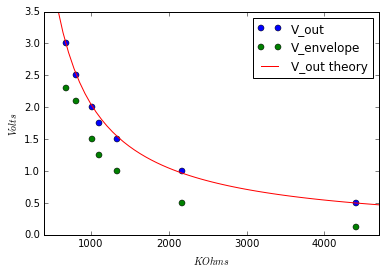

In [6]:
Rf=46670
Rg = np.linspace(500, 7500, 100)  # 1 .. 430 kOhms
V_in=0.043  # was measured to be around 0.05 on scope; try .043 to produce a better fit
V_out = V_in*(1+(Rf/Rg))

plt.plot(p.Rg*1000,p.Vout,'o',label='V_out');

plt.plot(p.Rg*1000,p.Venv,'o', label='V_envelope');

plt.plot(Rg,V_out, label='V_out theory');
plt.xlabel('$KOhms$')
plt.ylabel('$Volts$')
plt.ylim(0,3.5);
plt.xlim(400,4700);
plt.legend()

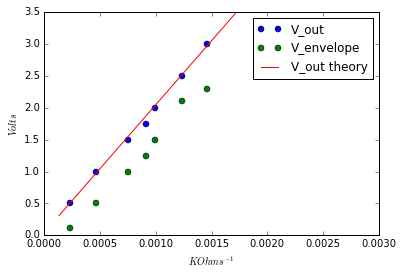

In [7]:
plt.plot(1/(p.Rg*1000),p.Vout,'o',label='V_out');
plt.plot(1/(p.Rg*1000),p.Venv,'o', label='V_envelope');
plt.plot(1/Rg,V_out, label='V_out theory');
plt.xlabel('$KOhms^{-1}$');
plt.ylabel('$Volts$')
plt.ylim(0,3.5);
plt.xlim(0,.003);
plt.legend()

This shift in the assumed V_in allowed us to fit V_out nicely.  The output of the scope for V_out is linear in $1/R_g$; it follows the op-amp gain equation, and V_in is what shifts the line to fit the curve.  This is consistent with the idea that the op-amp introduces a simple voltage offset into V_out.

V_env, the output of the envelope follower, also appears to be linear.  This should be assessed with further meaurements (these original measurements were hurried), and reading about the expected behavior of envelope follower circuits.

# NB

Great note on best practices around using op amps in sensor applications, and maximizing signal:

- http://www.nxp.com/files/sensors/doc/app_note/AN1525.pdf


## Next steps

- need to figure out what value of $R_f$ will be appropriate for tap water
- look into switch IC for $R_f$ for various conductivity ranges
- we might try creating an ideal diode configuration using the op-amp in the original design
- what is op-amp 'latch up' -- and is it a worry?

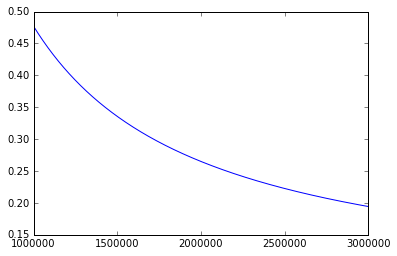

In [8]:
Rf=8E6
Rg = np.linspace(1E6, 3E6, 1000)  # 1 .. 430 kOhms
V_in=0.053  
V_out = V_in*(1+(Rf/Rg))
plt.plot(Rg,V_out, label='V_out theory')

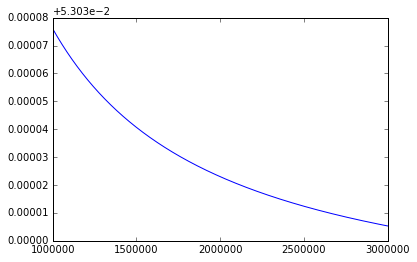

In [9]:
Rf=2000
Rg = np.linspace(1E6, 3E6, 1000)  # 1 .. 430 kOhms
V_in=0.053  
V_out = V_in*(1+(Rf/Rg))
plt.plot(Rg,V_out, label='V_out theory')

In [10]:
.00004*.05

2.0000000000000003e-06

## Test of ADC

vary measured resistance Rg, and measure the voltage output

used adafruit 12bit ads1015

setting: GAIN_ONE --> 1 bit = 2mV

test code is here:
https://gist.github.com/dwblair/6e55cf06e66442463368



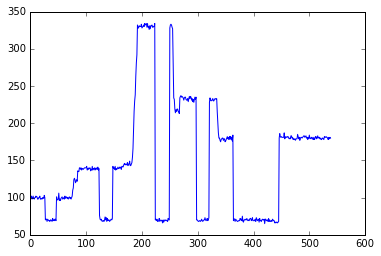

In [60]:
s=pd.read_table('./data/adc_test1.csv', header=0,sep=',',names=['Venv']); plt.plot(s.Venv);

(0, 100)

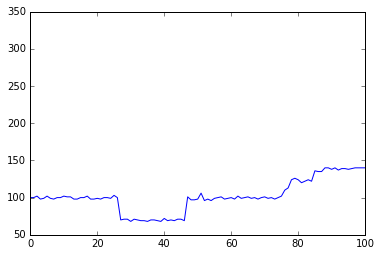

In [12]:
plt.plot(s.Venv); plt.xlim(0,100)

In [13]:
v1=np.average(s.Venv[0:20]);v1

99.799999999999997

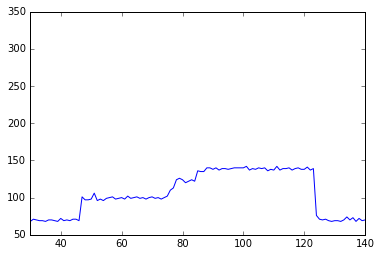

In [14]:
plt.plot(s.Venv); plt.xlim(30,140); 

In [15]:
v2=np.average(s.Venv[80:110]);v2

135.90000000000001

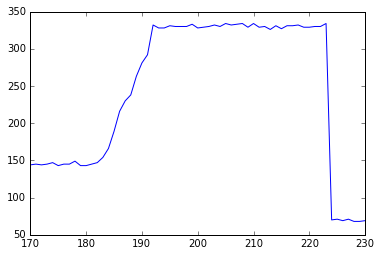

In [16]:
plt.plot(s.Venv); plt.xlim(170,230); 

In [17]:
v3=np.average(s.Venv[198:220]);v3

330.63636363636363

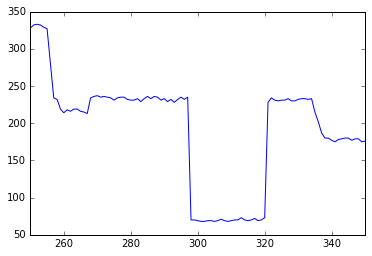

In [18]:
plt.plot(s.Venv); plt.xlim(250,350); 

In [19]:
v4=np.average(s.Venv[275:290]);v4

233.0

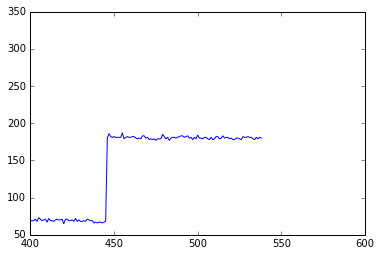

In [20]:
plt.plot(s.Venv); plt.xlim(400,600); 

In [61]:
v5=np.average(s.Venv[450:520]);v5

180.58571428571429

In [62]:
v6=500;v7=300;v8=400;v9=450;v10=75;v11=84;v12=66;v13=64;v14=740;v15=590;v16=850
Vbit=[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16];V = np.array(Vbit)*.002;V

array([ 0.1996    ,  0.2718    ,  0.66127273,  0.466     ,  0.36117143,
        1.        ,  0.6       ,  0.8       ,  0.9       ,  0.15      ,
        0.168     ,  0.132     ,  0.128     ,  1.48      ,  1.18      ,
        1.7       ])

In [63]:
Rg=[3.87E3,3.172E3,1.89E3,2.351E3,2.75E3,1.403E3,2.02E3,1.662E3,1.519E3,4.73E3,4.3E3,5.72E3,7.61E3,1.045E3,1.247E3,0.931E3];Rg

[3870.0,
 3172.0,
 1890.0,
 2351.0,
 2750.0,
 1403.0,
 2020.0,
 1662.0,
 1519.0,
 4730.0,
 4300.0,
 5720.0,
 7610.0,
 1045.0,
 1247.0,
 931.0]

In [64]:
d={'Rg': Rg, 'V':V};d

{'Rg': [3870.0,
  3172.0,
  1890.0,
  2351.0,
  2750.0,
  1403.0,
  2020.0,
  1662.0,
  1519.0,
  4730.0,
  4300.0,
  5720.0,
  7610.0,
  1045.0,
  1247.0,
  931.0],
 'V': array([ 0.1996    ,  0.2718    ,  0.66127273,  0.466     ,  0.36117143,
         1.        ,  0.6       ,  0.8       ,  0.9       ,  0.15      ,
         0.168     ,  0.132     ,  0.128     ,  1.48      ,  1.18      ,
         1.7       ])}

In [65]:
z=pd.DataFrame(d);z

,Rg,V
0,3870,0.199600
1,3172,0.271800
2,1890,0.661273
3,2351,0.466000
4,2750,0.361171
5,1403,1.000000
6,2020,0.600000
7,1662,0.800000
8,1519,0.900000
9,4730,0.150000


In [66]:
p=z.sort_values(['Rg'], ascending=[1]);p

,Rg,V
15,931,1.700000
13,1045,1.480000
14,1247,1.180000
5,1403,1.000000
8,1519,0.900000
7,1662,0.800000
2,1890,0.661273
6,2020,0.600000
3,2351,0.466000
4,2750,0.361171


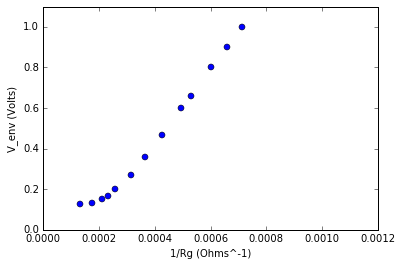

In [67]:
plt.plot(1/p.Rg,p.V,'o');plt.ylim(0,1.1);plt.xlabel('1/Rg (Ohms^-1)');plt.ylabel('V_env (Volts)')


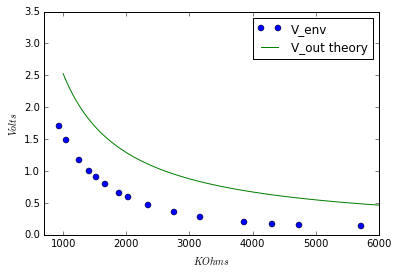

In [76]:
plt.plot(p.Rg,p.V,'o',label='V_env');plt.ylim(0,1.1);plt.xlabel('Rg (Ohms)');plt.ylabel('V_env (Volts)')

Rf=46670
Rg = np.linspace(1000, 6000, 100)  # 1 .. 430 kOhms
V_in=0.053  # was measured to be around 0.05 on scope; 
V_out = V_in*(1+(Rf/Rg))

plt.plot(Rg,V_out, label='V_out theory');
plt.xlabel('$KOhms$')
plt.ylabel('$Volts$')
plt.ylim(0,3.5);
plt.xlim(700,6000);
plt.legend()

In [49]:
65*.002 #we got around 65 bits, and the ADC resolution is 2 mV. So voltage out is:

0.13

## ADC analysis

This asymptotic voltage at larger Rg does *not* seem to be due to the op-amp.  It seems to be a feature of the ADC.

Note: 'Choosing an op-amp and adc for minimum offset': http://www.ti.com/lit/an/slaa064/slaa064.pdf

And: 'Data acquisition circuits': http://cds.linear.com/docs/en/application-note/an62.pdf

Comment:  we know that it saturates when V_out approaches 3.8 volts.  This would be as Rg gets smaller --> 1/Rg gets bigger, since V_out = V_in * (1 + Rf/Rg), and Rf is fixed at 47K.  So that saturation will happen towards the right of the above curve.  

The saturation on the left side (large Rg) is occurring at around 1/Rg = .0002 ...

In [30]:
Rg_sat = 1/.0002;Rg_sat

5000.0

I.e. around Rg=5K.  This is odd, as that is still a gain of 1+47K/5K = 10. So we'd expect that our Vout should be about .5 Volts, and Venv less than but close to it. 

In [31]:
87*.002

0.17400000000000002

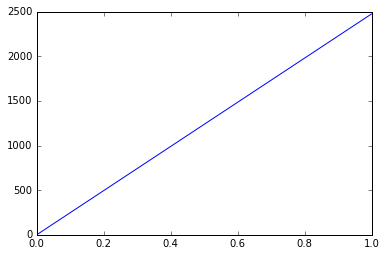

In [32]:
Rf=46670
Rg = np.linspace(1, 7500, 100)  # 1 .. 430 kOhms
V_in=0.053  # was measured to be around 0.05 on scope; 
V_out = V_in*(1+(Rf/Rg))

plt.plot(1/Rg,V_out, label='V_out theory');


Ah ... I changed Rg and saw a change on the multimeter output but not on the ADC ... so I'm running into some lower limit of the ADC.  This is something to check. 

Voltage reference diodes : LM4040DIZ-4.1/NOPB (5)

For now the easiest thing is probably to use the 16 bit adc with a gain of one.  This gives a voltage range of 0 to 4V (I know I won't exceed 3.8V because of op amp saturation), with a resolution of 0.125 mV. 

Test code is here:

https://gist.github.com/dwblair/f43bd196642c289239a0

So at this point, we might just start taking guesses at the proper range for Rf, given the likely range of tap water resistivity via our makeshift probe. As long as we set up the ADC and op-amp combo so that the voltage output won't ever go above the ADC limits no matter how low the resistance, then we can play.


In [33]:
30300*.125

3787.5

Nice.  I tried to max out the circuit by tuning Rg as low as I could.  The 16 bit ADC maxed out at about 30300, and at 0.125 mV per bit, that's 3.788 volts -- which is about where I'd seen the op-amp max out when testing with the oscilloscope.  

I also pulled out Rf, so that it's easier to replace with other options.

So: what accounts for the drop off at higer resistance? need to check this on multimeter or scope 

### Update

The above behavior of the ADC is not so mysterious.

We saw above in "ADC Analysis" that for R_g = 5K, we started to settle into about 65 on the 12 bit ADC.  Since the 12 bit ADC was on a gain setting of one, wherein the resolution is 2 mV per bit, this yields 0.002 * 65 = 0.13 volts when R_g~5K. 

The op-amp equation is: $$V_{out} = V_{in}(G + R_f / R_g)$$

We know that $V_{in}$ is about 0.053 volts.

R_f is 48K.

So the gain G, when R_g ~ 5K, is:

$G=1 + R_f/R_g = 1+48/5 = 10.6$

This means that we expect $V_{out} = G V_{in} = 10.6*0.053 = .56 

We see this in the theoretical curve for $V_{out}$.

But: what we are measuring now with the ADC is $V_env$, which is $V_{out}$ + a diode-based voltage divider, with a forward voltage drop. This likely accounts for the difference between the expected $V_in$ and $V_out$, and is consistent with what was observed earlier using the oscilloscope, in the first analyses in this notebook.  Thus: the output of the ADC is likely fine.

## Notes on envelope follower

We are using the envelope follower here:

https://wiki.analog.com/university/courses/electronics/text/chapter-7#envelope_detector

(Aside: this looks like a great online course from Analog devices)

(The diode used is the IN4001 (http://www.diodes.com/_files/datasheets/ds28002.pdf), which has a typical forward voltage drop, used on its own, of about .7 volts.)

This might point to the utility of using a 'super diode' or other configuration

There is a nice discussion of the various options, here:

Reference: https://wiki.analog.com/university/courses/electronics/text/chapter-7

Also interesting: logarithmic amplification -- might be good for allowing for larger range. 

Precision envelope detector:

https://en.wikipedia.org/wiki/Envelope_detector

Argument for doing all this with analog circuits rather than digital:
http://www.planetanalog.com/author.asp?section_id=396&doc_id=562072

considerations:
http://www.eng.auburn.edu/~roppeth/courses/TIMS-manuals-r5/TIMS%20Experiment%20Manuals/Student_Text/Vol-A1/a1-06.pdf

## Next steps re: envelope detector

Very nice discussion of using precision envelope detector, and how to address related issues:

http://www.ee.iitm.ac.in/vlsi/courses/ec330_2013/spectrumanalyzer

Look especially at the "rectifier + filter" circuit, which is referenced in wikipedia as a good way to proceed.

Expectation -- this will reduce the difference between $V_{out}$ and $V_{env}$, and likely increase our dynamic range in the circuit. Since we'll likely be dropping things down from 5V to 3V in this circuit, a simple envelope detector with typical forward voltage drop will very much reduce our range.

Meanwhile, we can also try to simply make some conductivity measurements such that we aren't hitting this lower barrier.

Good reference for units and general conductivity measurements:

http://www.mbhes.com/conductivity_measurement.htm  <--- FOLLOW THIS


## How to determine $R_f$ for a given range of conductivity

The trick is to choose R_f that is small enough that a given liquid sample doesn't max out $V_{out}$ before we hit the max voltage on our op-amp amplifier circuit (depends on rail-to-rail or not); and we want it big enough that we *nearly* hit max on $V_{out}$ when we're measuring our maximum expected conductivity (so we have the best resolution possible).  So, we can use a slope equation to just predict what $R_f$ should be given an expected $R_g$ range.  We also want the Rg associated with the conductivity range of interest to be such that our lowest measurements will be well above $V_{in}$+diode drop (if we're using a simple diode envelope detector) or $V_{in}$ (if we use a more precision circuit). 


In [55]:
1+48/5

10.6

## Frequency

There's an optimal frequency range for various conductivity ranges / solutions.

Ref: http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=848840&url=http%3A%2F%2Fieeexplore.ieee.org%2Fxpls%2Fabs_all.jsp%3Farnumber%3D848840

Download this. 

Also see:

http://www.analytical-chemistry.uoc.gr/files/items/6/618/agwgimometria_2.pdf

94 Hz in 4.000 µS and 40.00 µS ranges
46.9 kHz in 400.0 mS and 2.000 S ranges

So 2 kHz is sort of the middle point, for a range that is close to tap water (500 - 800 µS) -- not a bad place to start.

From the last reference above:

**Frequency change.**

Low frequencies are applied at low conductivities, where the polarisation
resistance is negligible compared to resistance of the solution. They
also contribute to reducing the cable capacitance effect, which is greater
when the conductivity is low (high solution resistance).
High frequencies are applied at high conductivities, where the solution
resistance is low.

In most conductivity meters, the frequency is automatically increased
with increasing conductance of the sample, to avoid polarisation errors
at high conductivity.


----- 

Pure water 0.055 µS/cm

Deionised water 1 µS/cm

Rainwater 50 µS/cm

Drinking water 500 µS/cm

Industrial wastewater 5 mS/cm

Seawater 50 mS/cm

1 mol/l NaCl 85 mS/cm

1 mol/l HCl 332 mS/cm

Distilled water	0.5	 

------

Solution	µS/cm	mS/cm	ppm

RO water	50-100	 	25-50

Domestic "tap" water	500-800	0.5-0.8	250-400

Potable water (max)	1055	1.055	528

Sea water	56,000	56	28,000

Brackish water	100,000	100	50,000


---------

### Cell constant

Note: for 2-pole cells, the standard used for the calibration must have a
conductivity value as close as possible to the conductivity of the sample
to measure.
When using a 2-pole cell, the choice of the cell constant value varies
with the linear measurement range of the cell selected. Typically, a cell
with K = 0.1 cm-1 is chosen for pure water measurements while, for environmental
water and industrial solutions a cell with K of 0.4 to 1 cm-1 is
used. Cells with up to K = 10 cm-1 are best for very high conductivity
samples.
In the case of a 4-pole cell, the cell constant value is generally included
in the range 0.5 to 1.5 cm-1.


### Next ADC (16 bit) test

running code for temperature and conductivity, here: https://gist.github.com/dwblair/edab5373a8470757e232

initial test run with potentiometer:

as increase R_g, bottom out at $V_{env}$ = 1270 (bits).  we're on the 16 bit adc, with a gain of one, where each bit is 0.125 mV.  So in volts, that's:

In [4]:
1270*0.000125

0.15875

0.16 volts -- comparable to before.  

Let's look at the noise (perhaps the 12 bit is just as good):

Below is using tap water and Rf=47K:

(0, 3.8)

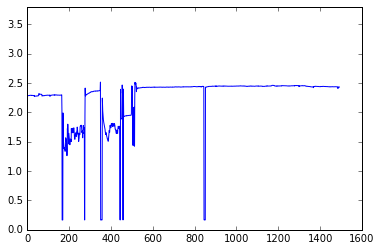

In [93]:
q=pd.read_table('./data/adc_test2.csv', header=0,sep=',',names=['Venv','tempC']);

plt.plot(q.Venv*.000125); #the conversion factor from 16 bit at gain one to volts is 1 bit = 0.125 mV
plt.ylim(0,3.8); #3.8 is the max output of our op-amp
#plt.xlim(1100,2300)

That got us directly in the middle of our range (max is 30000 on ADC).  

Now trying Rf=10K, and adding salt to Perrier water ... 

(0, 1.5)

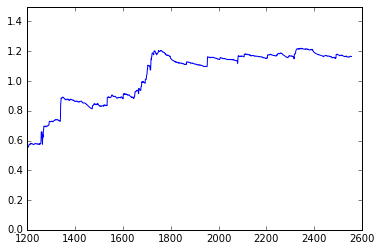

In [97]:
q=pd.read_table('./data/adc_test3.csv', header=0,sep=',',names=['Venv','tempC']);

plt.plot(q.Venv[1200:]*.000125); #the conversion factor from 16 bit at gain one to volts is 1 bit = 0.125 mV
plt.ylim(0,1.5); #3.8 is the max output of our op-amp
#plt.xlim(1100,2300)

Note that we begin very close to the minimum -- so, if want to distinguish conductivities less than that of tap water, might need to increase $R_f$ resistor. 

Also: when covering this range, field effects become less significant, it seems -- a least, orientation of device in container seemed to have less impact

In [28]:
q.Venv[560]

19393

In [29]:
q.Venv[680]

19427

value ranges: http://waterdata.usgs.gov/nwis/wys_rpt/?site_no=01104430&agency_cd=USGS

For your calibrations, the Federal chloride standards translate to about 875-925 uS/cm for chronic exceedance and 2500-3000 uS/cm for acute exceedances. I will be in the office everyday expect Friday this week and next so feel free to give me a buzz if you have any questions.
 
 According to this, over the last 15 or so years, the average value has been 1907uS/cm. Keep in mind this is sporadic data though from a jumble of locations and time intervals, but hopefully its useful.
 
 EXTREMES FOR PERIOD OF DAILY RECORD - 
 
 SPECIFIC CONDUCTANCE: Maximum recorded, 1,940 uS/cm, Mar. 20, 2001; minimum, 163 uS/cm, Nov. 26, 2000. WATER TEMPERATURE: Maximum recorded, 26.5 °C, June 26, 2001; minimum, 0.2 °C, Jan. 18, 2001. 
 
 EXTREMES FOR 2014 WATER YEAR.--

SPECIFIC CONDUCTANCE: Maximum recorded, 1,270 uS/cm, Mar. 24, 2014; minimum, 684 uS/cm, Dec. 29, 2013. WATER TEMPERATURE: Maximum recorded, 25.2 °C, July 24, 2014; minimum, 1.6 °C, Jan. 3, 2014. 

EXTREMES FOR 2015 WATER YEAR.--

SPECIFIC CONDUCTANCE: Maximum recorded, 1,140 uS/cm, Apr. 11, 2015; minimum, 485 uS/cm, Dec. 9, 2014. WATER TEMPERATURE: Maximum recorded, 26.2 °C, Sept. 3, 2015; minimum, 1.9 °C, Dec. 20, 2014.

so .... 100 uS to 5000, say

 

### Update on voltage drop between V_out and V_env

Note that the difference is completely consistent -- same difference for all Rg, and about the amount we'd expect from a diode forward voltage 